In [ ]:
import numpy as np
import pandas as pd
distance  = np.zeros((51,51))
coordinate = open(r'/content/drive/My Drive/Colab Notebooks/cities_coordinate.txt')  ##讀取位置信息
cities_coordinate = []
for line in coordinate:
  city_nuber, city_x, city_y =  line.split(" ")
  cities_coordinate.append([int(city_x), int(city_y)])
for i in range(len(cities_coordinate)):
  for j in range(len(cities_coordinate)):
    distance[i,j] = ((cities_coordinate[i][0]-cities_coordinate[j][0])**2+(cities_coordinate[i][1]-cities_coordinate[j][1])**2)**0.5  ##計算距離矩陣


In [ ]:
import pandas as pd
aco_csv = pd.read_csv("/content/drive/MyDrive/ACO.csv", header=None)
aco_data = [aco_csv.iloc[i][0] for i in range(100)]

In [ ]:
import random
import numpy as np
def walk_probability(pheromone, distance, start, end, alpha, beta, walked_state=[]):  ##計算轉移機率
  denominator = 0
  for i in range(len(pheromone)):
    if start == i or i in walked_state:
      continue
    denominator += pheromone[start,i]**alpha*distance[start,i]**(-beta)
  return (pheromone[start, end]**alpha * distance[start, end]**(-beta))/denominator

def choose_next_state(pheromone, distance, start, alpha, beta, walked_state=[], anti_rate = None):  ##找到下一個state
  r = random.uniform(0,1)
  q = random.uniform(0,1)
  probability = []
  for i in range(len(pheromone)):
    if start != i and i not in walked_state:
      probability.append(walk_probability(pheromone, distance, start, i, alpha, beta, walked_state))
  all_state = [x for x in range(len(pheromone))]
  possible_state = [item for item in all_state if item not in walked_state]
  if anti_rate:
    if q < anti_rate:
      return random.sample(possible_state, k = 1)[0]
  for i in range(len(probability)):
    r -= probability[i]
    if r <0:
      return possible_state[i]
  


In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def getKey(dct,value):
     return [key for key in dct if (dct[key] == value)][0]

def get_fitness(vector):  
  total_distance = 0 
  for i in range(len(vector)-1):
    total_distance += distance[vector[i], vector[i+1]]
  return total_distance

def mutate(vector, mutation_rate):  ##每一位數都有mutation_rate的機率變異
  for i in range(len(vector)):
    r = random.uniform(0,1)
    if r < mutation_rate:
      mutate_to = random.randint(0, len(vector)-1)
      vector[i], vector[vector.index(mutate_to)] = mutate_to, vector[i]
  return vector

def crossover(parent_vector1, parent_vector2, mutation_rate, method = "Partially"):  ##結合兩個父母的染色體，拆的地方是隨機的
  if method == "Partially":
    temp = {}
    parent_vector1, parent_vector2 = parent_vector1[:(len(parent_vector1)-1)], parent_vector2[:(len(parent_vector2)-1)]
    start_index = random.randint(1, len(parent_vector1)-2)
    end_index = random.randint(start_index+1, len(parent_vector1)-1)
    for i in range(end_index-start_index+1):
      if parent_vector1[i+start_index] in temp.values():
        temp[getKey(temp, parent_vector1[i+start_index])] = parent_vector2[i+start_index]
      else:
        temp[parent_vector1[i+start_index]] = parent_vector2[i+start_index]
    delete = []

    for repeat in range(len(temp)):
      for one in temp.values():
        if one in temp:
          temp[getKey(temp, one)] = temp[one]
          delete.append(one)
    for one in delete:
      try:
        del temp[one]
      except:
        continue

    for j in range(start_index):
      if parent_vector1[j] in temp.values():
        parent_vector1[j] = getKey(temp, parent_vector1[j])
      if parent_vector2[j] in temp:
        parent_vector2[j] = temp[parent_vector2[j]]

    for k in range(len(parent_vector1)-1-end_index):
      if parent_vector1[k+end_index+1] in temp.values():
        parent_vector1[k+end_index+1] = getKey(temp, parent_vector1[k+end_index+1])
      if parent_vector2[k+end_index+1] in temp:
        parent_vector2[k+end_index+1] = temp[parent_vector2[k+end_index+1]]

    parent_vector1[start_index:(end_index+1)], parent_vector2[start_index:(end_index+1)] = parent_vector2[start_index:(end_index+1)], parent_vector1[start_index:(end_index+1)]
    parent_vector1.append(parent_vector1[0])
    parent_vector2.append(parent_vector2[0])
    parent_vector1, parent_vector2 = mutate(parent_vector1, mutation_rate), mutate(parent_vector2, mutation_rate)
    return [parent_vector1, parent_vector2]

  if method == "circle":
    parent_vector1, parent_vector2 = parent_vector1[:(len(parent_vector1)-1)], parent_vector2[:(len(parent_vector2)-1)]
    start_index = random.randint(0, len(parent_vector1)-1)
    point_record = [start_index]
    point = parent_vector1.index(parent_vector2[start_index])
    while point != start_index:
      point_record.append(point)
      point = parent_vector1.index(parent_vector2[point])
    nonselection = [x for x in range(len(parent_vector1)) if x not in point_record]
    for i in nonselection:
      parent_vector1[i], parent_vector2[i] = parent_vector2[i], parent_vector1[i]
    parent_vector1, parent_vector2 = mutate(parent_vector1, mutation_rate), mutate(parent_vector2, mutation_rate)
    parent_vector1.append(parent_vector1[0])
    parent_vector2.append(parent_vector2[0])
    return [parent_vector1, parent_vector2]
    
  if method == "order":
    parent_vector1, parent_vector2 = parent_vector1[:(len(parent_vector1)-1)], parent_vector2[:(len(parent_vector2)-1)]
    start_index = random.randint(1, len(parent_vector1)-2)
    end_index = random.randint(start_index+1, len(parent_vector1)-1)
    unchange1 = parent_vector1[start_index:(end_index+1)]
    unchange2 = parent_vector2[start_index:(end_index+1)]
    change1 = []
    change2 = []
    for one in parent_vector2:
      if one not in unchange1:
        change1.append(one)

    for one in parent_vector1:
      if one not in unchange2:
        change2.append(one)
      
    parent_vector1[:start_index], parent_vector2[:start_index] = change1[(-start_index):], change2[(-start_index):]
    parent_vector1[(end_index+1):], parent_vector2[(end_index+1):] = change1[:(-start_index)], change2[:(-start_index)]
    parent_vector1.append(parent_vector1[0])
    parent_vector2.append(parent_vector2[0])
    parent_vector1, parent_vector2 = mutate(parent_vector1, mutation_rate), mutate(parent_vector2, mutation_rate)
    return [parent_vector1, parent_vector2]

def select(population, crossover_rate, method = "Tournament"):  ##根據Roulette wheel selection或者Tournament selection的方法選擇可以繁衍的染色體
  selection = []
  selection_num = 2 * int(len(population) * crossover_rate/2)
  if method == "Roulette":
    fitness = []
    for chromosome in population:
      fitness.append(1/get_fitness(chromosome))
    k = 0
    while len(selection) < selection_num:
      k += 1
      i = k % len(population)
      r = random.uniform(0,1)
      if r < fitness[i]/sum(fitness):
        selection.append(population[i])

  if method == "Tournament":
    while len(selection) < selection_num:
      n_select = random.choices(population, k =5)
      n_select_fitness = []
      for chromosome in n_select:
        n_select_fitness.append(get_fitness(chromosome))
      selection.append(n_select[np.argmin(n_select_fitness)])  
  return selection

9 99 iteration: the shortest distance (before GA): 487.9431837256177


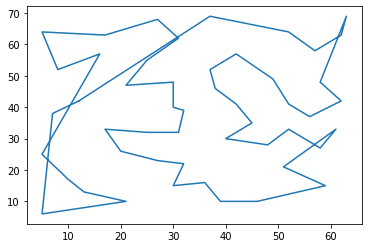

9 99 iteration: the shortest distance (after GA): 473.48585537189734


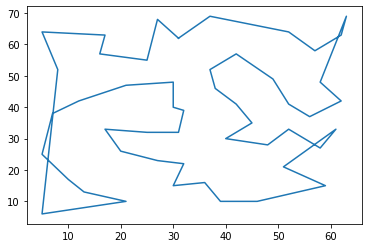


100%|██████████| 100/100 [12:58<00:00,  7.79s/it]


In [ ]:
from google.colab import output
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math
from tqdm import tqdm 

ant_number = 51  ##螞蟻數量
pheromone_decay = 0.1  ##信息素的衰退速率
max_run = 10
iteration = 100  ##最大迭代次數
alpha = 1  ##信息素的重要性慘數
beta = 5  ##距離的重要性參數
shortest_distance = np.Inf  ##最短距離初始化
pheromone = np.ones((51,51))  ##信息素初始化
pheromone *= (500*51)**(-1)
counting = 0
patience = 50  ##若結果不變一定數量，則程序終止
convergence = False
anti_rate = 0

new_population_size = 100
mutation_rate = 0.01  
crossover_rate = 0.8
max_generation = 200
selection_method = "Tournament"
crossover_method = "Partially"

ACO_record = np.zeros((max_run, iteration), dtype='int')
GA_record = np.zeros((max_run, iteration), dtype='int')
for r in range(max_run):
  for i in tqdm(range(iteration)):
    delta_pheromone = np.zeros((51,51))
    ants_distance = []
    ants_path = []
    for j in range(ant_number):
      start = 0
      walked_distance = 0
      first_city = random.randint(0, len(pheromone)-1)
      walked_state = [first_city]
      for k in range(len(pheromone)-1):
        next_state = choose_next_state(pheromone, distance, start, alpha, beta, walked_state, anti_rate = 0)
        walked_distance += distance[start, next_state]  ##距離計算
        walked_state.append(next_state)  ##路徑紀錄
        start = next_state
      walked_distance += distance[next_state, first_city]  ##返回初始點
      walked_state.append(first_city)
      for l in range(len(pheromone)):
        delta_pheromone[walked_state[l], walked_state[l+1]] += 1/walked_distance  ##信息素增量計算
      ants_distance.append(walked_distance)
      ants_path.append(walked_state)
    # if shortest_distance > min(ants_distance):
    #   shortest_distance = min(ants_distance)
    #   shortest_path = ants_path[np.argmin(ants_distance)]

    x = []
    y = []
    for one in ants_path[np.argmin(ants_distance)]:  ##按順序紀錄位置
      x.append(cities_coordinate[one][0])
      y.append(cities_coordinate[one][1]) 
    clear_output(wait=True)
    print(r, i,"iteration: the shortest distance (before GA):",min(ants_distance))
    ACO_record[r,i] = min(ants_distance)
    plt.plot(x, y)  ##繪圖
    plt.show()

    shortest_distance = np.Inf
    population = ants_path.copy()
    for s in range(new_population_size-ant_number):
      chromosome = random.sample([x for x in range(51)],  k=51)
      chromosome.append(chromosome[0])
      population.append(chromosome)

    for generation in range(max_generation):
      selection = select(population, crossover_rate, method = selection_method)  ##根據crossover_rate選擇一定數量的染色體用來繁衍（可能重複）
      nonselection = [x for x in population if x not in selection]  ##將沒被選上的拿出來
      selection = random.sample(selection,  k=len(selection))  ##打亂順序繁衍
      offspring = []
      for j in range(int(len(selection)/2)):
        offspring = offspring + crossover(selection[2*j], selection[2*j+1], mutation_rate, method = crossover_method)  ##將選中的染色體兩兩配對繁衍
      new_population = nonselection[0:(100-len(offspring))] + offspring  ##由於選擇的時候可能重複，因此為了不讓總population超過100，刪去一部分沒被選上的染色體
      new_population_fitness = []

      for one in new_population:
        new_population_fitness.append(get_fitness(one))
      

      if shortest_distance > min(new_population_fitness):
        shortest_distance = min(new_population_fitness)
        shortest_path = new_population[np.argmin(new_population_fitness)]
        greatest_generation = new_population
        greatest_fitness = new_population_fitness

    for m in range(len(greatest_generation)):
      walked_distance = greatest_fitness[m]
      walked_state = greatest_generation[m]
      for l in range(len(pheromone)):
        delta_pheromone[walked_state[l], walked_state[l+1]] += 1/walked_distance

    pheromone = (1-pheromone_decay) * pheromone + delta_pheromone  ##信息素更新
    x = []
    y = []
    for one in shortest_path:  ##按順序紀錄位置
      x.append(cities_coordinate[one][0])
      y.append(cities_coordinate[one][1]) 
    print(r, i,"iteration: the shortest distance (after GA):", shortest_distance)
    GA_record[r,i] = shortest_distance
    plt.plot(x, y)  ##繪圖
    plt.show()


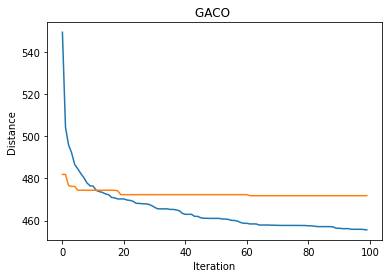

In [ ]:
average_ACO_record = np.mean(ACO_record, axis = 0)
average_GA_record = np.mean(GA_record, axis = 0)
max_ACO_record = [np.min(average_ACO_record[0:i]) for i in range(1,iteration+1)]
max_GA_record = [np.min(average_GA_record[0:i]) for i in range(1,iteration+1)]
best_of_all_record = [min(max_ACO_record[i], max_GA_record[i]) for i in range(iteration)]
title = 'GACO '
plt.title(title)
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.plot([x for x in range(iteration)], aco_data, '-', label = "ACO")
plt.plot([x for x in range(iteration)], best_of_all_record, '-', label = "ACO+GA")